In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

**1. Exploratory Data Analysis(EDA)**

1.1 Understand the dataset: Load the dataset and display its basic structures (.head(), .info(), .describe()).

In [91]:
#Load the data
df = pd.read_csv("ENTER PATH")

In [92]:
print("Rows and Columns: ",df.shape)

Rows and Columns:  (13500, 14)


In [93]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,11810,15605293.0,Ch'ang,707.0,France,Female,38.0,2.0,0.00,2.0,1.0,1.0,126812.63,0.0
1,970,15650026.0,Tsao,596.0,France,Male,38.0,6.0,0.00,2.0,0.0,1.0,479.54,0.0
2,1598,15751743.0,H?,699.0,France,Male,41.0,3.0,0.00,2.0,1.0,1.0,159899.97,0.0
3,11805,15610900.0,P'an,669.0,Germany,Male,33.0,1.0,125689.40,2.0,1.0,1.0,111342.66,0.0
4,2582,15574858.0,Kaeppel,678.0,Germany,Female,42.0,7.0,115532.52,1.0,1.0,0.0,76676.47,1.0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13500 entries, 0 to 13499
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               13500 non-null  int64  
 1   CustomerId       13500 non-null  float64
 2   Surname          13500 non-null  object 
 3   CreditScore      13500 non-null  float64
 4   Geography        13500 non-null  object 
 5   Gender           13500 non-null  object 
 6   Age              13500 non-null  float64
 7   Tenure           13500 non-null  float64
 8   Balance          13500 non-null  float64
 9   NumOfProducts    13500 non-null  float64
 10  HasCrCard        13500 non-null  float64
 11  IsActiveMember   13500 non-null  float64
 12  EstimatedSalary  13500 non-null  float64
 13  Exited           13500 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.4+ MB


In [95]:
#Drop the columns that are not required
df = df.drop(['id','CustomerId','Surname'], axis=1)

In [96]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Missing values: 

In [97]:
def missing_values(df):
    print(df.isna().sum().sum())


In [98]:
missing_values(df)

0


There are no missing values in the dataset

Descriptive Statistics : 
- Calculate summary statistics for numerical columns (mean, median, standard deviation, quartiles, etc.).

In [99]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,13500.000000,13500.000000,13500.000000,1.350000e+04,13500.000000,13500.000000,13500.000000,1.350000e+04,13500.000000
mean,658.928519,37.885111,5.034222,4.388542e+04,1.582296,0.786296,0.495852,1.181757e+05,0.203852
std,73.542132,8.210130,2.788149,1.455078e+05,0.527597,0.409935,0.500001,6.975739e+04,0.402875
min,431.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,1.157000e+01,0.000000
25%,602.000000,32.000000,3.000000,0.000000e+00,1.000000,1.000000,0.000000,8.305814e+04,0.000000
50%,661.000000,37.000000,5.000000,0.000000e+00,2.000000,1.000000,0.000000,1.229255e+05,0.000000
75%,710.000000,42.000000,7.000000,1.099513e+05,2.000000,1.000000,1.000000,1.567748e+05,0.000000
max,850.000000,72.000000,15.000000,1.545434e+07,4.000000,1.000000,1.000000,6.090906e+06,1.000000


1.2. Visualise the distribution of features: Use histograms for numerical variables and count plots for categorical
features.

In [100]:
numerical_features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

- For categorical columns, analyze the frequency distribution/countplot of each category.

In [101]:
#printing the unique values in categorical columns
for col in categorical_features:
    print(col,df[col].unique())
    print("-"*50)

Geography ['France' 'Germany' 'Spain']
--------------------------------------------------
Gender ['Female' 'Male']
--------------------------------------------------
HasCrCard [1. 0.]
--------------------------------------------------
IsActiveMember [1. 0.]
--------------------------------------------------


Frequency distribution/CountPlot for Geography:
Geography
France     8148
Spain      2947
Germany    2405
Name: count, dtype: int64




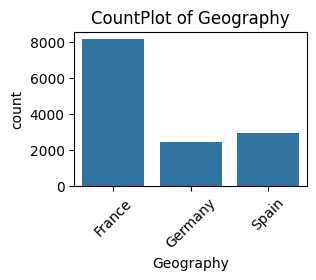

Frequency distribution/CountPlot for Gender:
Gender
Male      7631
Female    5869
Name: count, dtype: int64




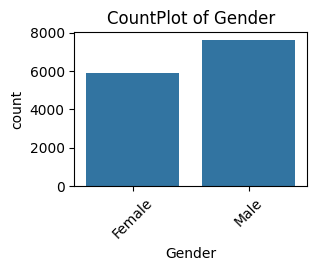

Frequency distribution/CountPlot for HasCrCard:
HasCrCard
1.0    10615
0.0     2885
Name: count, dtype: int64




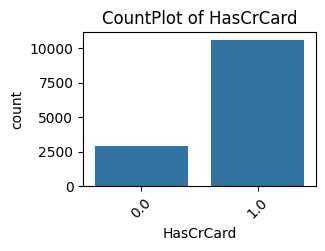

Frequency distribution/CountPlot for IsActiveMember:
IsActiveMember
0.0    6806
1.0    6694
Name: count, dtype: int64




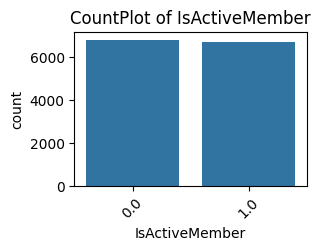

In [102]:
for i in categorical_features:
    print(f"Frequency distribution/CountPlot for {i}:")
    print(df[i].value_counts())  # Count frequency of each category
    print("\n")

    # Plot the distribution using a count plot
    plt.figure(figsize=(3, 2))
    sns.countplot(data=df, x=i)
    plt.title(f'CountPlot of {i}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

In [103]:
print(df['Exited'].value_counts())

Exited
0.0    10748
1.0     2752
Name: count, dtype: int64


**Insights**
1. CustomerID, ID and Surname dropped as they are not required for modelling
2. No missing values in the dataset
3. Class imbalance identified (Will apply SMOTE later)

Visualize the distribution of numerical features using histograms.

**Histogram for numerical features**

In [104]:
def plot_histogram(df,c):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[c], kde=True)
    plt.title(f'Histogram of {c}')
    c_mean = df[c].mean()
    c_median = df[c].median()
    plt.axvline(c_mean, color='red', linestyle='--', label='Mean')
    plt.axvline(c_median, color='green', linestyle='-.', label='Median')
    plt.legend()
    plt.show()

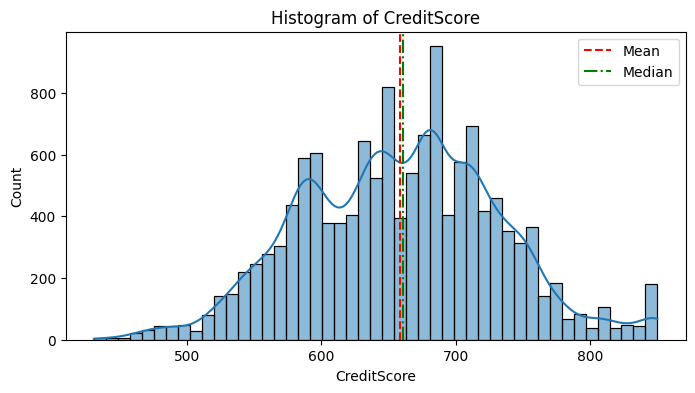

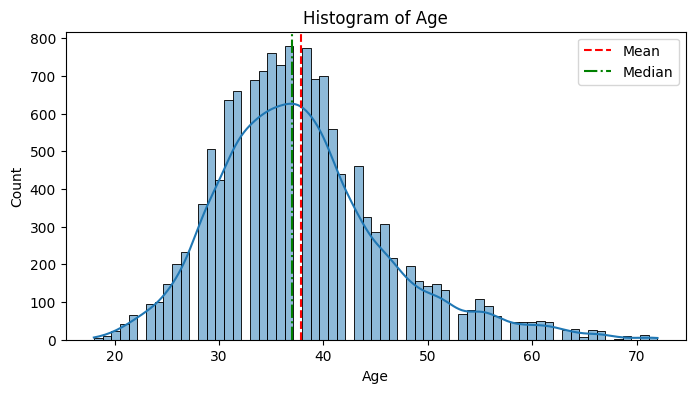

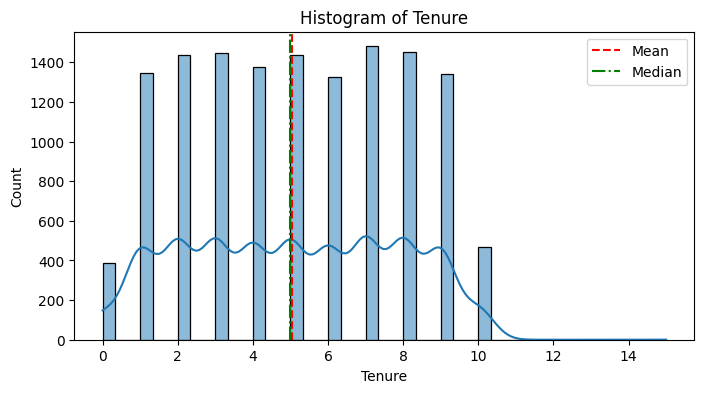

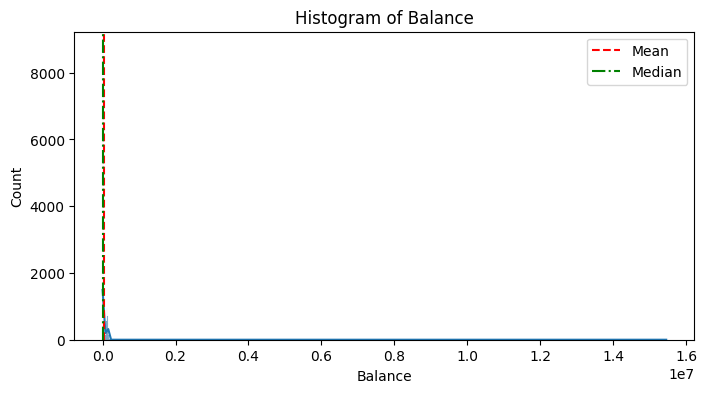

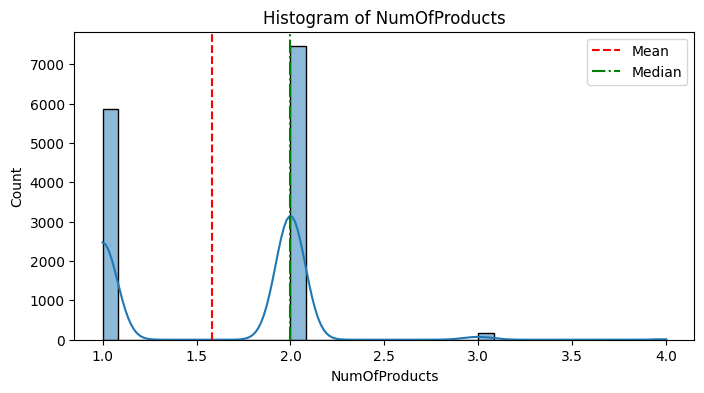

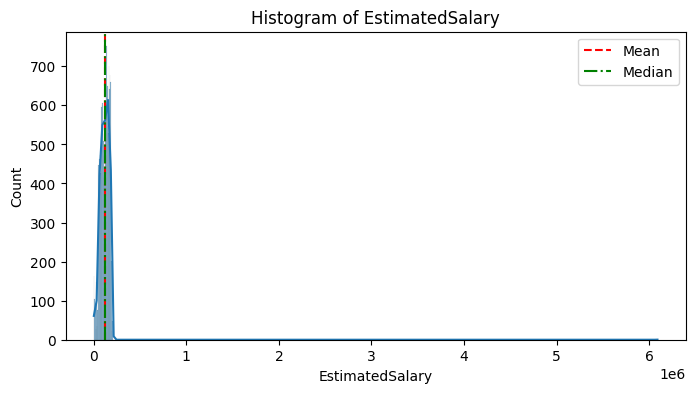

In [105]:
for col in numerical_features:
    plot_histogram(df,col)

1.3 Compare the distribution of features for each target class: Use violin plots for numerical variables and
stacked bar plots for categorical variables.

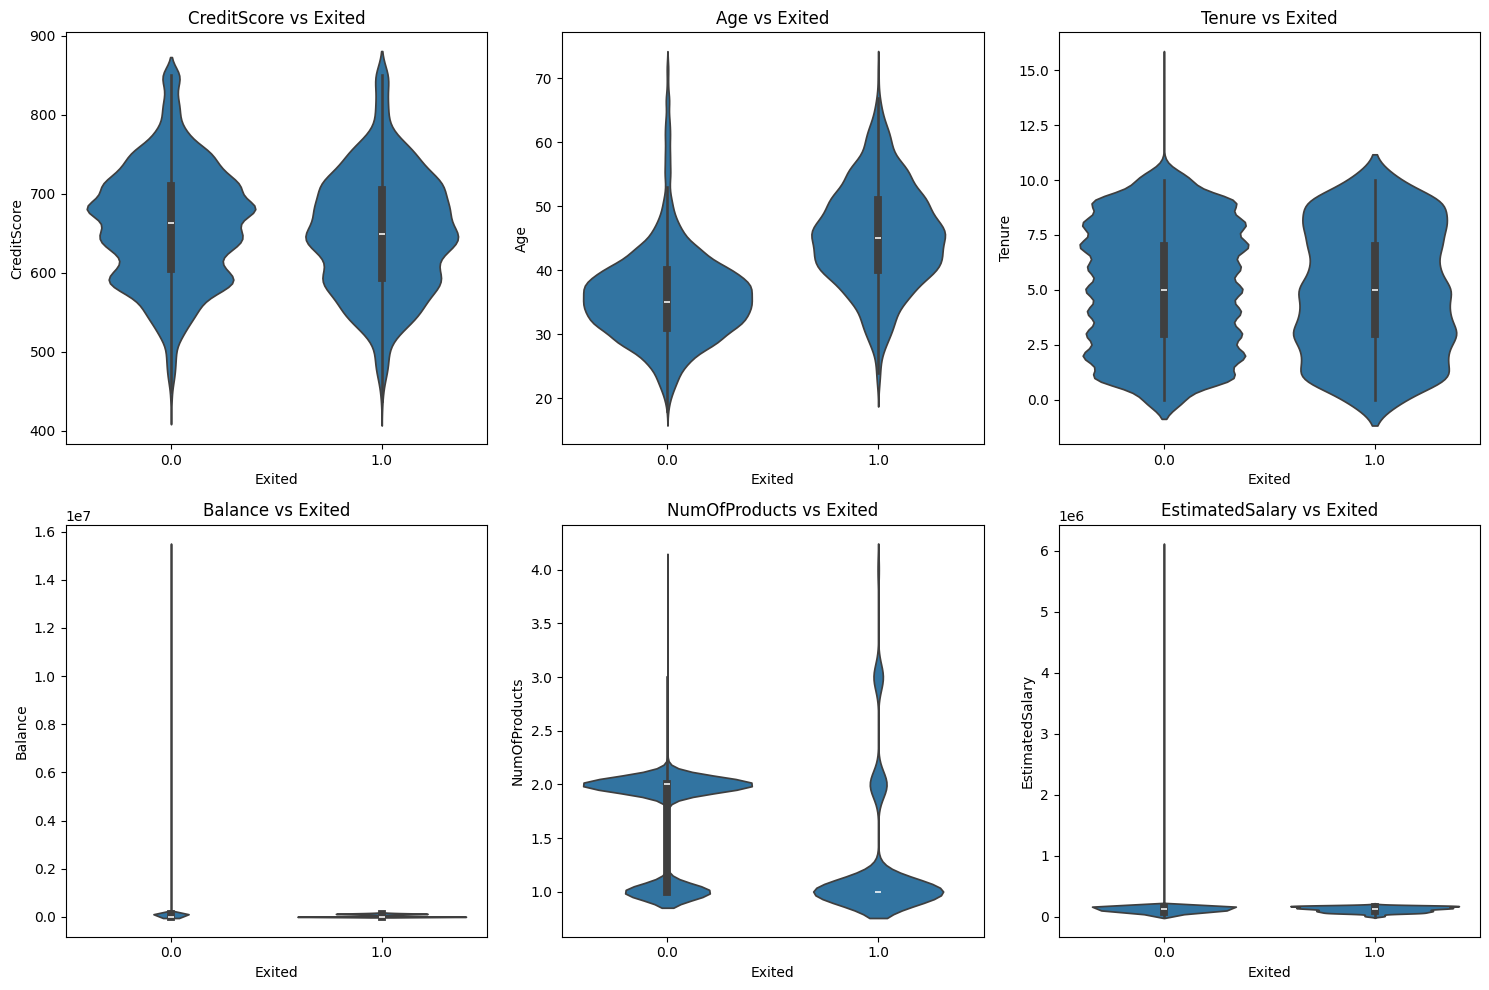

In [106]:
# Visualizing the distribution of numerical features using violin plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i) 
    sns.violinplot(data=df, x='Exited', y=feature)
    plt.title(f'{feature} vs Exited')
    plt.xlabel('Exited')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

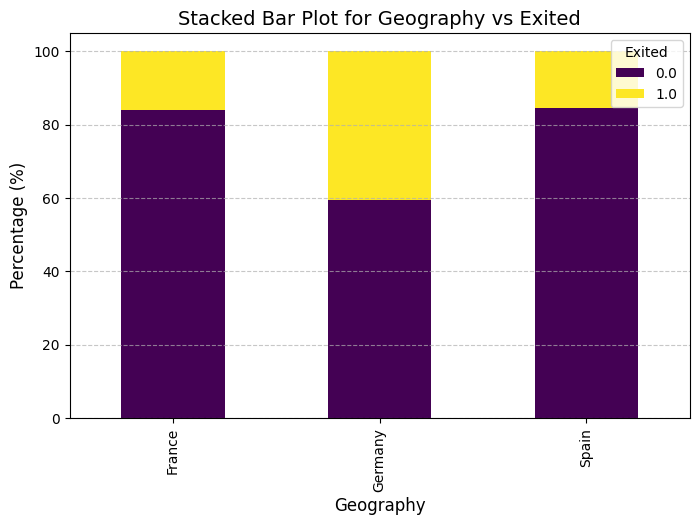

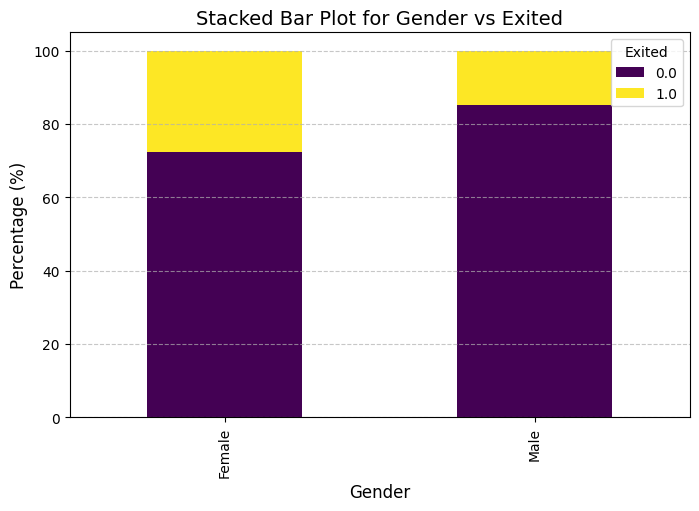

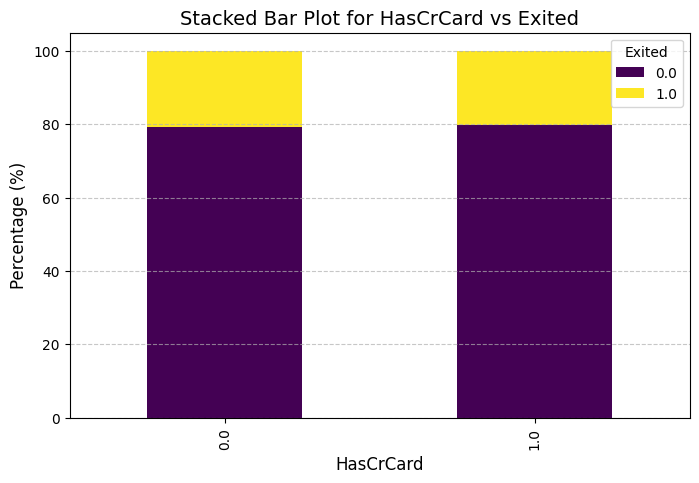

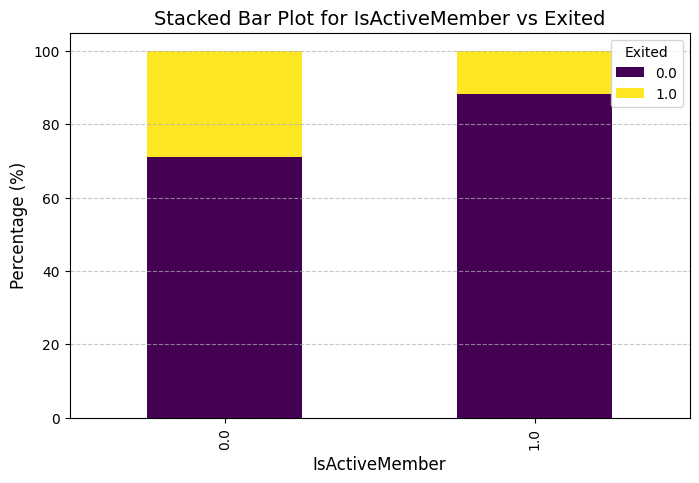

In [107]:
target_variable = 'Exited'  

for feature in categorical_features:
    cross_tab = pd.crosstab(df[feature], df[target_variable], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
    plt.title(f'Stacked Bar Plot for {feature} vs {target_variable}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.legend(title=target_variable, loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

**2. Data Preprocessing**

2.1 Remove outliers: Use boxplots and the interquartile range (IQR) method to identify and remove outliers

In [108]:
def boxplot(df,column,title_suffix):
    plt.figure(figsize=(3, 2))
    sns.boxplot(x=df[column])  
    plt.title(f'Boxplot of {column} ({title_suffix})')  
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.show()

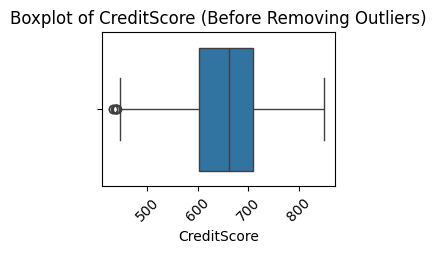

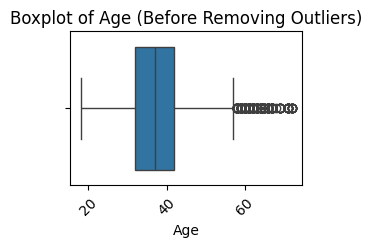

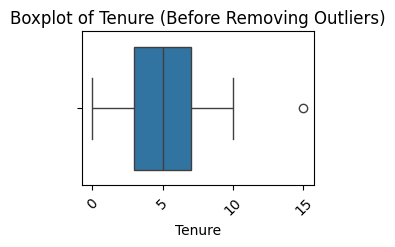

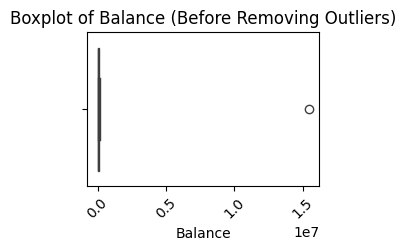

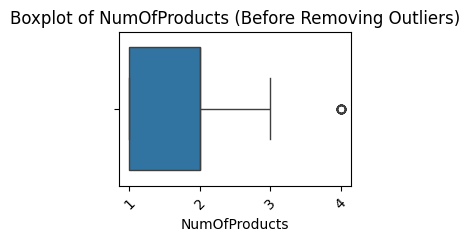

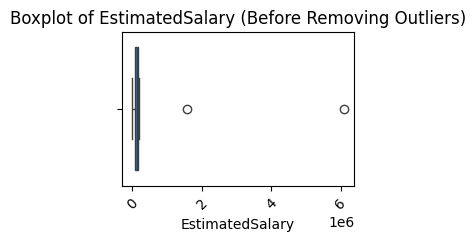

In [109]:
for i in numerical_features:
    boxplot(df,i,"Before Removing Outliers")

In [110]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

In [111]:
for col in numerical_features:
    df = remove_outliers_iqr(df, col)

2.2 One-hot encoding: Convert categorical variables to numerical ones using one-hot encoding.

In [112]:
df_encoded = pd.get_dummies(df, columns = categorical_features, drop_first=True).astype(int)


2.3 Standardize numerical variables: Apply z-score normalization using StandardScaler from sklearn.

In [113]:
scaler = StandardScaler()

df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

print(df_encoded.head())

   CreditScore       Age    Tenure   Balance  NumOfProducts  EstimatedSalary  \
0     0.650354  0.115326 -1.088679 -0.710311       0.806696         0.202337   
1    -0.861886  0.115326  0.346162 -0.710311       0.806696        -2.575007   
2     0.541363  0.534139 -0.729969 -0.710311       0.806696         0.929733   
3     0.132650 -0.582696 -1.447389  1.393168       0.806696        -0.137760   
4     0.255264  0.673744  0.704873  1.223185      -1.127041        -0.899868   

   Exited  Geography_Germany  Geography_Spain  Gender_Male  HasCrCard_1.0  \
0       0                  0                0            0              1   
1       0                  0                0            1              0   
2       0                  0                0            1              1   
3       0                  1                0            1              1   
4       1                  1                0            0              1   

   IsActiveMember_1.0  
0                   1  
1       

**3. Logistic Regression**

3.1 Data splitting: Split the data into training and testing sets (80:20 split) without randomization.

3.2 Implement Logistic Regression from scratch: Write the algorithm from first principles and train the model.

In [693]:
import numpy as np

class LogisticRegression:
    def __init__(self, lr=0.01, n_iters=1000, batch_size=None, threshold=0.5, lambda_reg=0.01,split=0.8):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.batch_size = batch_size
        self.threshold = threshold
        self.split = split
        self.lambda_reg = lambda_reg  # Regularization strength

    def split_data(self,df):
        x = df.drop('Exited',axis = 1)
        y = df["Exited"]

        split_point = int(self.split * len(df))

        x_train = x.iloc[:split_point]
        y_train = y.iloc[:split_point]
        x_test = x.iloc[split_point:]
        y_test = y.iloc[split_point:]

        x_train = x_train.astype(float).values
        y_train = y_train.astype(float).values
        x_test = x_test.astype(float).values
        y_test = y_test.astype(float).values
        
        return x_train,x_test,y_test,y_train

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)
        self.bias = np.random.rand()  # A scalar value


        if self.batch_size is None:
            self.batch_size = n_samples

        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]

        # Process each batch
        for start in range(0, n_samples, self.batch_size):
            end = start + self.batch_size
            X_batch = X[start:end]
            y_batch = y[start:end]

            # Compute predictions for the batch
            linear_model = np.dot(X_batch, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # Compute gradients with L2 regularization
            dw = (1 / len(y_batch)) * np.dot(X_batch.T, (y_pred - y_batch)) + (2 * self.lambda_reg * self.weights)
            db = (1 / len(y_batch)) * np.sum(y_pred - y_batch) + self.bias

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        y_pred_cls = [1 if i > self.threshold else 0 for i in y_pred]
        return y_pred_cls


In [694]:
model = LogisticRegression(lr=0.02,n_iters=1500,batch_size = 32,threshold = 0.4,lambda_reg=0.1,split=0.8)
x_train,x_test,y_test,y_train = model.split_data(df_encoded)
model.fit(x_train,y_train)
#{'lr': 0.2, 'n_iters': 2000, 'batch_size': 16, 'threshold': 0.5}

In [695]:
y_pred = model.predict(x_test)

3.3 Performance evaluation: Report accuracy, precision, recall, and F1 scores on the test set.

In [696]:
# Function to calculate metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("-" * 40)

In [697]:
evaluate_model(y_test, y_pred, "Custom Logistic Regression")

Custom Logistic Regression Metrics:
Accuracy: 84.46%
Precision: 0.59
Recall: 0.69
F1 Score: 0.64
----------------------------------------


3.4 Comparison: Compare results with the default sklearn implementations of LogisticRegression, SVC and
DecisionTreeClassifier.

In [698]:
# Train and evaluate scikit-learn Logistic Regression
sklearn_lr = SklearnLogisticRegression(max_iter=1500)
sklearn_lr.fit(x_train, y_train)
y_pred_sklearn_lr = sklearn_lr.predict(x_test)
evaluate_model(y_test, y_pred_sklearn_lr, "Scikit-Learn Logistic Regression")

Scikit-Learn Logistic Regression Metrics:
Accuracy: 88.77%
Precision: 0.78
Recall: 0.60
F1 Score: 0.68
----------------------------------------


In [699]:
# Train and evaluate SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
evaluate_model(y_test, y_pred_svc, "SVC")

SVC Metrics:
Accuracy: 89.58%
Precision: 0.81
Recall: 0.61
F1 Score: 0.70
----------------------------------------


In [700]:
# Train and evaluate Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
evaluate_model(y_test, y_pred_dt, "Decision Tree Classifier")

Decision Tree Classifier Metrics:
Accuracy: 84.35%
Precision: 0.59
Recall: 0.64
F1 Score: 0.61
----------------------------------------


**Competitive Part**

1. Feature Engineering and Selection: Analyse correlations between features and drop highly correlated or
low-variance features. Engineer new features as needed.

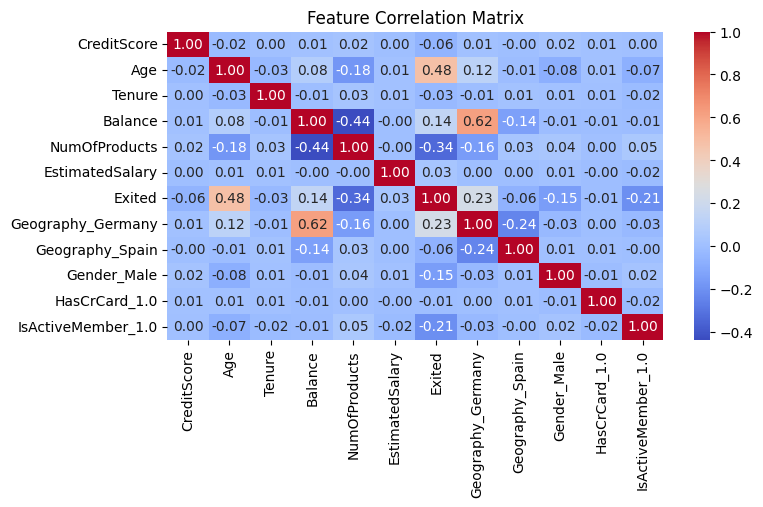

In [701]:
#Correlation Matrix
corr_matrix = df_encoded.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [702]:
#Drop highly correlated features 
threshold = 0.5
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [
    column 
    for column in upper_tri.columns 
    if any(abs(upper_tri[column]) > threshold) and column != 'Exited'
]

df_reduced = df_encoded.drop(columns=to_drop)

In [703]:
print(to_drop)

['Geography_Germany']


In [717]:
model = LogisticRegression(lr=0.02,n_iters=1500,batch_size = 32,threshold = 0.4,lambda_reg=0.1,split=0.8)
x_train,x_test,y_test,y_train = model.split_data(df_reduced)
model.fit(x_train,y_train)
#{'lr': 0.2, 'n_iters': 2000, 'batch_size': 16, 'threshold': 0.5}
y_pred = model.predict(x_test)
evaluate_model(y_test, y_pred, "Custom Logistic Regression")

Custom Logistic Regression Metrics:
Accuracy: 84.12%
Precision: 0.58
Recall: 0.71
F1 Score: 0.64
----------------------------------------


In [718]:
def drop_low_variance_features(df, threshold=0.5, target_column='Exited'):
    # Separate target column if present
    if target_column in df.columns:
        target = df[target_column]
        df = df.drop(columns=[target_column])
    else:
        target = None

    # Create variance threshold selector
    selector = VarianceThreshold(threshold=threshold)
    
    # Fit and transform the data
    selector.fit(df)
    
    # Get feature mask and feature names
    feature_mask = selector.get_support()
    selected_features = df.columns[feature_mask].tolist()

    # Create new dataframe with selected features
    df_filtered = df[selected_features]
    
    # Add target column back if it was removed
    if target is not None:
        df_filtered[target_column] = target

    # Print removed features
    removed_features = df.columns[~feature_mask].tolist()
    print(f"Removed features: {removed_features}")
    
    return df_filtered

In [719]:
df_reduced2=drop_low_variance_features(df_reduced,0.01)

Removed features: []


In [741]:
df = df_reduced2
df['Balance_to_Products'] = df['Balance'] / (df['NumOfProducts'] + 1e-9)  # Avoid division by zero
df['Age_to_Balance'] = df['Age'] / (df['Balance'] + 1e-9)
df['TotalValue'] = df['Balance'] + df['EstimatedSalary']
df['High_Balance_Flag'] = (df['Balance'] > df['Balance'].median()).astype(int)
df['Senior_Customer_Flag'] = (df['Age'] > 50).astype(int)
df['Customer_Engagement_Score'] = df['IsActiveMember_1.0'] + df['NumOfProducts'] + df['HasCrCard_1.0']


In [768]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Assume df_reduced2 is your input DataFrame
poly = PolynomialFeatures(degree=2, interaction_only=True)

# Transform the data and get feature names
df_poly = pd.DataFrame(
    poly.fit_transform(df_reduced2), 
    columns=poly.get_feature_names_out(df_reduced2.columns)  # Use get_feature_names_out()
)


In [790]:
model = LogisticRegression(lr=0.02,n_iters=1500,batch_size = 32,threshold = 0.4,lambda_reg=0.1,split=0.8)
x_train,x_test,y_test,y_train = model.split_data(df_poly)
model.fit(x_train,y_train)
#{'lr': 0.2, 'n_iters': 2000, 'batch_size': 16, 'threshold': 0.5}
y_pred = model.predict(x_test)
evaluate_model(y_test, y_pred, "Custom Logistic Regression")

Custom Logistic Regression Metrics:
Accuracy: 88.35%
Precision: 0.68
Recall: 0.77
F1 Score: 0.72
----------------------------------------


In [791]:
#SMOTE
model = LogisticRegression(lr=0.02,n_iters=1500,batch_size = 32,threshold = 0.4,lambda_reg=0.1,split=0.8)
x_train,x_test,y_test,y_train = model.split_data(df_poly)
smote = SMOTE(random_state=42)
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)
pd.Series(y_train_smote).value_counts()

0.0    8429
1.0    8429
Name: count, dtype: int64

In [792]:
model = LogisticRegression(lr=0.2,n_iters=500,batch_size = 8,threshold = 0.7,lambda_reg=0.1)
model.fit(x_train_smote,y_train_smote)
#{'lr': 0.2, 'n_iters': 500, 'batch_size': 8, 'threshold': 0.7}

In [793]:
y_pred = model.predict(x_test)

In [816]:
evaluate_model(y_pred,y_test,"SMOTE Logistic Regression")

SMOTE Logistic Regression Metrics:
Accuracy: 87.36%
Precision: 0.82
Recall: 0.64
F1 Score: 0.72
----------------------------------------


In [819]:
# Hyperparameter Grid
param_grid = {
    "lr": [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2],  # Added smaller and larger learning rates
    "n_iters": [500, 1000, 1500, 2000, 2500],    # Extended iterations range
    "batch_size": [8, 16, 32, 64, 128],          # Included smaller and larger batch sizes
    "threshold": [0.3, 0.4, 0.5, 0.6, 0.7],      # More threshold values for fine-tuning
    "lambda_reg": [0.1,0.2,0.3,0.4,0.5]
}


# Variables to store the best results
best_params = None
best_metrics = {
    "accuracy": 0,
    "precision": 0,
    "recall": 0,
    "f1_score": 0
}

# Hyperparameter Tuning Loop
for lr in param_grid['lr']:
    for n_iters in param_grid['n_iters']:
        for batch_size in param_grid['batch_size']:
            for threshold in param_grid['threshold']:
                for lambda_reg in param_grid['lambda_reg']:
                    # Initialize and fit the model
                    model = LogisticRegression(lr=lr, n_iters=n_iters, batch_size=batch_size, threshold=threshold,lambda_reg=lambda_reg,split=0.8)
                    model.fit(x_train_smote, y_train_smote)

                    # Predict on the test set
                    y_pred_cls = model.predict(x_test)

                    # Calculate metrics
                    acc = accuracy_score(y_test, y_pred_cls)
                    precision = precision_score(y_test, y_pred_cls, zero_division=0)
                    recall = recall_score(y_test, y_pred_cls)
                    f1 = f1_score(y_test, y_pred_cls)

                    # Check if this is the best model so far
                    if f1 > best_metrics["f1_score"]:
                        best_params = {
                            "lr": lr,
                            "n_iters": n_iters,
                            "batch_size": batch_size,
                            "threshold": threshold,
                            "lambda_reg":lambda_reg
                        }
                        best_metrics = {
                            "accuracy": acc,
                            "precision": precision,
                            "recall": recall,
                            "f1_score": f1
                        }

# Output the best parameters and metrics
print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_metrics['accuracy'] * 100:.2f}%")
print(f"Precision: {best_metrics['precision']:.2f}")
print(f"Recall: {best_metrics['recall']:.2f}")
print(f"F1 Score: {best_metrics['f1_score']:.2f}")


Best Parameters: {'lr': 0.01, 'n_iters': 1000, 'batch_size': 8, 'threshold': 0.7, 'lambda_reg': 0.1}
Best Accuracy: 94.81%
Precision: 0.92
Recall: 0.80
F1 Score: 0.86


In [825]:
model = LogisticRegression(0.01,1000,8,0.7,0.1)
model.fit(x_train_smote,y_train_smote)
y_pred = model.predict(x_test)
evaluate_model(y_test,y_pred,"fin")

fin Metrics:
Accuracy: 94.12%
Precision: 0.91
Recall: 0.77
F1 Score: 0.84
----------------------------------------
